# proposal
gather data from film databasees to demonstrate which genre/writters/directors/actors in films are most profiatble at the box office, over a relatively short period of time

In [1]:
#pandas for reading data and converting them to DataFrameds for using Dataframe methods. 
#numpy and scipy for calculating said data
import pandas as pd
import numpy as np
import scipy as sp
#create graphs of the data that has been analyzed
import matplotlib.pyplot as plt
#make said graphs "prettier" and more enjoyable to read
import seaborn as sns
#view matplots in this notebook
%matplotlib inline

i need to gather films that were highest grossing at the box office. and if available, the names of directors, writters and actors in said films. and just to make sure my biases arent effecting the data too much, the rating for each film. 

after doing the below steps, i will go back to the origional data to see if there are other correlations

1) read all available databases and see what data is inside
2) covert to pandas Dataframes and remove columns that are not part of my hypothesis. 
3) join dataframes based on film title and get average rating
4) make four dataframes, one joined based on genre, one on writters, one on directors, one on actors, and make graphs
    for each based on pearson correlation, and see which has the highest correlation
    
the tables available *Box Office Mojo* database with gross revenue
*IMDB* databases with movie title, actors, directors, writters seperate tables

i will need to join those tables and order them by titles


after looking through all the databases and finding missing titles that were definitely profitable, i have decided to use
a joined table of The Numbers databse, and Watch Mojo database as the main database, and then join to it and compare against it

### Import data, and put each table into a dataframe

In [2]:
imdb_film_title = pd.read_csv("unzipped-data/imdb.title.basics.csv")
imdb_film_title.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [3]:
box_mojo_gross = pd.read_csv("unzipped-data/bom.movie_gross.csv")
box_mojo_gross.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


In [4]:
people_involved_profession_relatedTitles = pd.read_csv("unzipped-data/imdb.name.basics.csv")
people_involved_profession_relatedTitles.head(2)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


In [5]:
film_title_crew_reference_index = pd.read_csv("unzipped-data/imdb.title.crew.csv")
film_title_crew_reference_index.head(2)

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"


In [6]:
job_title_category_index = pd.read_csv("unzipped-data/imdb.title.principals.csv")
job_title_category_index.head(2)

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN


In [7]:
imdb_ratings_index = pd.read_csv("unzipped-data/imdb.title.ratings.csv")
imdb_ratings_index.head(5)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [8]:
the_numbers_gross = pd.read_csv("unzipped-data/tn.movie_budgets.csv")
the_numbers_gross.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


# Data Cleaning

### data from The Numbers was in string format, and we need it as Integers

In [9]:
the_numbers_gross['domestic_gross'] = the_numbers_gross['domestic_gross'].str.replace(r'\D', '').astype(int)

C:\Users\yonic\AppData\Local\Temp/ipykernel_20692/566704501.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  the_numbers_gross['domestic_gross'] = the_numbers_gross['domestic_gross'].str.replace(r'\D', '').astype(int)


In [10]:
the_numbers_gross['production_budget'] = the_numbers_gross['production_budget'].str.replace(r'\D', '').astype(int)

C:\Users\yonic\AppData\Local\Temp/ipykernel_20692/1828636146.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  the_numbers_gross['production_budget'] = the_numbers_gross['production_budget'].str.replace(r'\D', '').astype(int)


In [11]:
the_numbers_gross['worldwide_gross'] = the_numbers_gross['worldwide_gross'].str.replace(r'\D', '').astype(float)

C:\Users\yonic\AppData\Local\Temp/ipykernel_20692/2739544300.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  the_numbers_gross['worldwide_gross'] = the_numbers_gross['worldwide_gross'].str.replace(r'\D', '').astype(float)


In [12]:
the_numbers_gross['worldwide_gross'] = the_numbers_gross['worldwide_gross'].astype(int)

#### to join BoxMojo and TheNumbers data, it's easier if the columns have the same name

In [13]:
box_mojo_gross = box_mojo_gross.rename(columns={'title': 'movie'})

In [14]:
box_mojo_gross['movie'] = box_mojo_gross['movie'].astype(str)

In [15]:
the_numbers_gross['movie'] = the_numbers_gross['movie'].astype(str)

#### concatenate both tables, because i was having lots of trouble joining them

In [17]:
mojo_numbers = pd.concat([box_mojo_gross, the_numbers_gross])

checking data to make sure a popular movie is actually still in there

In [18]:
mojo_numbers.loc[mojo_numbers['movie'] == 'Jurassic Park']

,movie,studio,domestic_gross,foreign_gross,year,id,release_date,production_budget,worldwide_gross
824,Jurassic Park,NaN,395708305.0,NaN,NaN,25.0,"Jun 11, 1993",63000000.0,1.038813e+09


see how many rows are null, to see how much more cleaning is neccessary

In [19]:
mojo_numbers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9169 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              9169 non-null   object 
 1   studio             3382 non-null   object 
 2   domestic_gross     9141 non-null   float64
 3   foreign_gross      2037 non-null   object 
 4   year               3387 non-null   float64
 5   id                 5782 non-null   float64
 6   release_date       5782 non-null   object 
 7   production_budget  5782 non-null   float64
 8   worldwide_gross    5782 non-null   float64
dtypes: float64(5), object(4)
memory usage: 716.3+ KB


### Get list of profitable films

In [20]:
some_profit = mojo_numbers.loc[(mojo_numbers['domestic_gross'] - mojo_numbers['production_budget']) > 1]
some_profit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2677 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              2677 non-null   object 
 1   studio             0 non-null      object 
 2   domestic_gross     2677 non-null   float64
 3   foreign_gross      0 non-null      object 
 4   year               0 non-null      float64
 5   id                 2677 non-null   float64
 6   release_date       2677 non-null   object 
 7   production_budget  2677 non-null   float64
 8   worldwide_gross    2677 non-null   float64
dtypes: float64(5), object(4)
memory usage: 209.1+ KB


Drop unneccessary columns

In [21]:
some_profit = some_profit.drop(columns=['studio', 'foreign_gross', 'year'])
some_profit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2677 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              2677 non-null   object 
 1   domestic_gross     2677 non-null   float64
 2   id                 2677 non-null   float64
 3   release_date       2677 non-null   object 
 4   production_budget  2677 non-null   float64
 5   worldwide_gross    2677 non-null   float64
dtypes: float64(4), object(2)
memory usage: 146.4+ KB


merge data with profit numbers with film ratings from IMDB

In [22]:
imdb_mojo_numbers = pd.merge(mojo_numbers, imdb_film_title, left_on='movie', right_on='primary_title')

Add columns with profit amounts per film

In [23]:
imdb_mojo_numbers['domestic_profit'] = imdb_mojo_numbers['domestic_gross'] - imdb_mojo_numbers['production_budget']
imdb_mojo_numbers['intnl_profit'] = imdb_mojo_numbers['worldwide_gross'] - imdb_mojo_numbers['production_budget']
imdb_mojo_numbers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7181 entries, 0 to 7180
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              7181 non-null   object 
 1   studio             3363 non-null   object 
 2   domestic_gross     7157 non-null   float64
 3   foreign_gross      2043 non-null   object 
 4   year               3366 non-null   float64
 5   id                 3815 non-null   float64
 6   release_date       3815 non-null   object 
 7   production_budget  3815 non-null   float64
 8   worldwide_gross    3815 non-null   float64
 9   tconst             7181 non-null   object 
 10  primary_title      7181 non-null   object 
 11  original_title     7180 non-null   object 
 12  start_year         7181 non-null   int64  
 13  runtime_minutes    6526 non-null   float64
 14  genres             7069 non-null   object 
 15  domestic_profit    3815 non-null   float64
 16  intnl_profit       3815 

In [24]:
top_gross = imdb_mojo_numbers.sort_values('domestic_profit', ascending=False)
top_hundred = top_gross.head(100)
top_gross.head(8)

,movie,studio,domestic_gross,foreign_gross,year,id,release_date,production_budget,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,domestic_profit,intnl_profit
4544,Black Panther,NaN,700059566.0,NaN,NaN,42.0,"Feb 16, 2018",200000000.0,1.348258e+09,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",500059566.0,1.148258e+09
4976,Titanic,NaN,659363944.0,NaN,NaN,43.0,"Dec 19, 1997",200000000.0,-2.147484e+09,tt2495766,Titanic,Titanic,2012,NaN,Adventure,459363944.0,-2.347484e+09
4977,Titanic,NaN,659363944.0,NaN,NaN,43.0,"Dec 19, 1997",200000000.0,-2.147484e+09,tt8852130,Titanic,Titanic,2018,115.0,Family,459363944.0,-2.347484e+09
2739,Jurassic World,NaN,652270625.0,NaN,NaN,34.0,"Jun 12, 2015",215000000.0,1.648855e+09,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",437270625.0,1.433855e+09
4548,Incredibles 2,NaN,608581744.0,NaN,NaN,44.0,"Jun 15, 2018",200000000.0,1.242521e+09,tt3606756,Incredibles 2,Incredibles 2,2018,118.0,"Action,Adventure,Animation",408581744.0,1.042521e+09
4970,The Avengers,NaN,623279547.0,NaN,NaN,27.0,"May 4, 2012",225000000.0,1.517936e+09,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",398279547.0,1.292936e+09
4542,Avengers: Infinity War,NaN,678815482.0,NaN,NaN,7.0,"Apr 27, 2018",300000000.0,2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",378815482.0,1.748134e+09
5008,Beauty and the Beast,NaN,376057266.0,NaN,NaN,86.0,"Nov 13, 1991",20000000.0,6.084311e+08,tt9173998,Beauty and the Beast,Beauty and the Beast,2018,60.0,"Family,Fantasy,Musical",356057266.0,5.884311e+08


# Make graph comparing production budget VS profit
to see if there is a concentration of a certain "price range" for a film
that would possibly hint to a limit of financial investment

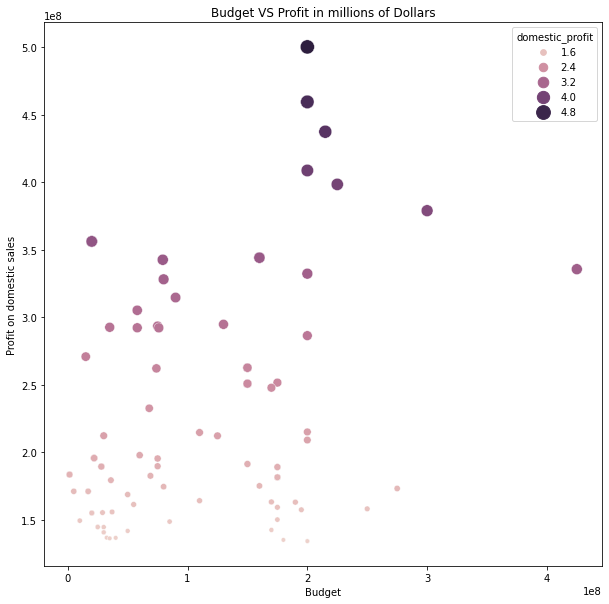

In [25]:
plt.figure(figsize=[10, 10])
sns.scatterplot(data=top_hundred, 
                x='production_budget', 
                y='domestic_profit', 
                hue='domestic_profit',
                size='domestic_profit',
                sizes=(20, 200))
plt.title("Budget VS Profit in millions of Dollars")
plt.xlabel("Budget")
plt.ylabel("Profit on domestic sales");

## same as above but for international sales

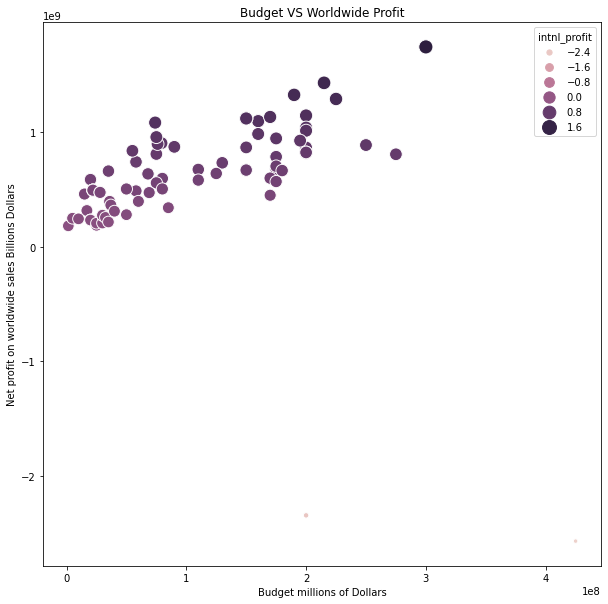

In [26]:
plt.figure(figsize=[10, 10])
sns.scatterplot(data=top_hundred, 
                x='production_budget', 
                y='intnl_profit', 
                hue='intnl_profit',
                size='intnl_profit',
                sizes=(20, 200))
plt.title("Budget VS Worldwide Profit")
plt.xlabel("Budget millions of Dollars")
plt.ylabel("Net profit on worldwide sales Billions Dollars");

### calculate standard deviation

In [27]:
standev_dom = round(top_gross['domestic_profit'].std(), 0)
standev_dom

50618720.0

In [28]:
better_than_avg_dom = top_gross.loc[top_gross['domestic_profit'] > standev_dom]
better_than_avg_dom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 4544 to 2283
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              373 non-null    object 
 1   studio             0 non-null      object 
 2   domestic_gross     373 non-null    float64
 3   foreign_gross      0 non-null      object 
 4   year               0 non-null      float64
 5   id                 373 non-null    float64
 6   release_date       373 non-null    object 
 7   production_budget  373 non-null    float64
 8   worldwide_gross    373 non-null    float64
 9   tconst             373 non-null    object 
 10  primary_title      373 non-null    object 
 11  original_title     373 non-null    object 
 12  start_year         373 non-null    int64  
 13  runtime_minutes    330 non-null    float64
 14  genres             365 non-null    object 
 15  domestic_profit    373 non-null    float64
 16  intnl_profit       373

## same graph as above, but with films taht made more than standard deviation

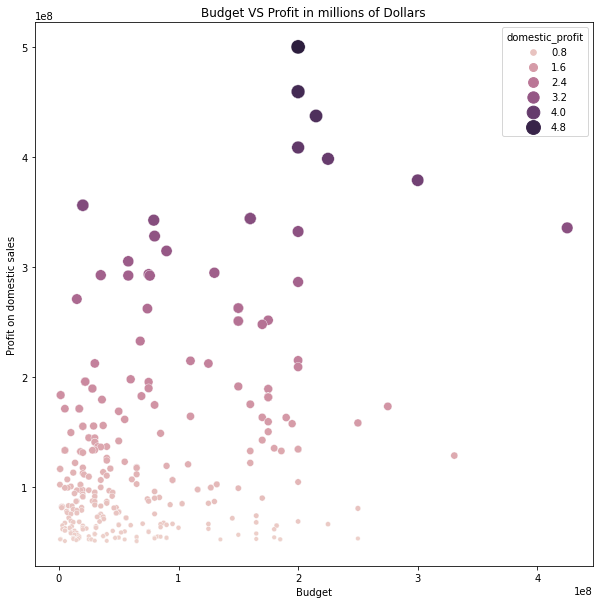

In [93]:
plt.figure(figsize=[10, 10])
sns.scatterplot(data=better_than_avg_dom, 
                x='production_budget', 
                y='domestic_profit', 
                hue='domestic_profit',
                size='domestic_profit',
                sizes=(20, 200))
plt.title("Budget VS Profit in millions of Dollars")
plt.xlabel("Budget")
plt.ylabel("Profit on domestic sales");

### now we have a list of movies that performed better than average financially.
lets see how it matches up with IMDB ratings


In [29]:
top_rated = imdb_ratings_index.loc[imdb_ratings_index['averagerating'] > 9]
top_rated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 183 to 73834
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         1000 non-null   object 
 1   averagerating  1000 non-null   float64
 2   numvotes       1000 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 31.2+ KB


get list of people in popular movies

In [30]:
pep_in_pop = job_title_category_index.loc[job_title_category_index['tconst'].isin(top_rated['tconst'])]
pep_in_pop.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7022 entries, 189 to 1027783
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tconst      7022 non-null   object
 1   ordering    7022 non-null   int64 
 2   nconst      7022 non-null   object
 3   category    7022 non-null   object
 4   job         1037 non-null   object
 5   characters  2766 non-null   object
dtypes: int64(1), object(5)
memory usage: 384.0+ KB


In [31]:
pep_in_pop['nconst'].value_counts()

nm8802619    4
nm3167849    4
nm4813335    3
nm6795049    3
nm9396612    3
            ..
nm5464449    1
nm5464892    1
nm5465575    1
nm3921864    1
nm5104351    1
Name: nconst, Length: 6873, dtype: int64

In [32]:
pep_in_pop.head()

,tconst,ordering,nconst,category,job,characters
189,tt10121022,10,nm10591489,self,NaN,"[""Himself""]"
190,tt10121022,1,nm10620900,self,NaN,"[""Herself""]"
191,tt10121022,2,nm10591482,self,NaN,"[""Himself""]"
192,tt10121022,3,nm10591483,self,NaN,"[""Himself""]"
193,tt10121022,4,nm10591484,self,NaN,"[""Herself""]"


#### get list of actors in popular movies

In [33]:
actors = pep_in_pop.loc[pep_in_pop['category'].str.contains('act|self', regex=True)]
actors

,tconst,ordering,nconst,category,job,characters
189,tt10121022,10,nm10591489,self,NaN,"[""Himself""]"
190,tt10121022,1,nm10620900,self,NaN,"[""Herself""]"
191,tt10121022,2,nm10591482,self,NaN,"[""Himself""]"
192,tt10121022,3,nm10591483,self,NaN,"[""Himself""]"
193,tt10121022,4,nm10591484,self,NaN,"[""Herself""]"
...,...,...,...,...,...,...
1027425,tt8937428,9,nm10132188,actor,NaN,"[""Demonio del Infierno""]"
1027777,tt9261416,1,nm4740006,actor,NaN,"[""Pastor Joe""]"
1027778,tt9261416,2,nm4074219,actress,NaN,"[""Tasha Bennet""]"
1027779,tt9261416,3,nm7609247,actress,NaN,"[""Linda""]"


In [34]:
actors['nconst'].value_counts()

nm8802619    4
nm5954636    3
nm6034610    3
nm4847702    3
nm2502988    3
            ..
nm1826889    1
nm3655078    1
nm4643207    1
nm0904340    1
nm3891109    1
Name: nconst, Length: 3084, dtype: int64

#### get list of Directors/Writers in popular movies
(from a seperate database)

#####  how many unique people in each movie
from the `film_title_crew_reference_index` database

In [35]:
jobs_in_pop_mov = film_title_crew_reference_index.loc[film_title_crew_reference_index['tconst'].isin(top_rated['tconst'])]
jobs_in_pop_mov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 37 to 146109
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tconst     1000 non-null   object
 1   directors  979 non-null    object
 2   writers    685 non-null    object
dtypes: object(3)
memory usage: 31.2+ KB


In [36]:
jobs_in_pop_mov.head()

,tconst,directors,writers
37,tt10140002,"nm0104200,nm1098369",nm0104200
167,tt1652390,"nm2739675,nm3900394","nm2739675,nm3900608"
208,tt1808567,nm2489519,nm7091973
281,tt1859482,nm1413104,NaN
370,tt2083935,"nm1626841,nm4959612","nm1626841,nm3982118"


## more data cleaning before merging data
merging directors/writers names with data from imdb where each name has an
`nconst` value associated with each name

In [37]:
valid_writers = jobs_in_pop_mov.loc[jobs_in_pop_mov['writers'].notna()]

In [38]:
valid_writers = valid_writers.drop(columns='directors')

In [39]:
valid_writers

,tconst,writers
37,tt10140002,nm0104200
167,tt1652390,"nm2739675,nm3900608"
208,tt1808567,nm7091973
370,tt2083935,"nm1626841,nm3982118"
821,tt4135932,nm1978171
...,...,...
145649,tt7456158,nm3688760
145681,tt7527526,nm2134681
145713,tt7599970,"nm9337512,nm9337511"
145845,tt7954050,nm1904091


In [40]:
valid_writers['writers'] = valid_writers['writers'].apply(lambda x: x[0: -1].split(','))

In [41]:
valid_writers = valid_writers.explode('writers')

In [42]:
valid_writers.rename(columns={'writers': 'nconst'}, inplace=True)


In [43]:
valid_writers['nconst'] = valid_writers['nconst'].astype(str)

In [44]:
valid_writers['nconst'].values

array(['nm010420', 'nm2739675', 'nm390060', ..., 'nm933751', 'nm190409',
       'nm1007135'], dtype=object)

In [73]:
top_rated.head()

,tconst,averagerating,numvotes
183,tt1651906,9.2,9
385,tt6780706,9.4,18
392,tt6850078,9.2,18
398,tt6867356,9.1,9
406,tt6922138,9.2,17


In [45]:
writers_names = pd.merge(valid_writers, people_involved_profession_relatedTitles[['nconst', 'primary_name']], on='nconst')

In [75]:
writers_names

,tconst,nconst,primary_name
0,tt1652390,nm2739675,Ari Davidovich
1,tt2083935,nm1626841,Michael Koepenick
2,tt4198654,nm2188529,Jason Davidson
3,tt4198654,nm2119891,D'Lytha Myers
4,tt4198654,nm3071005,Nathan D. Myers
...,...,...,...
339,tt3312722,nm6090223,Hadas Afari
340,tt3312722,nm1462520,Luis Blanco Nazoa
341,tt5212746,nm7740525,Catherine Seo
342,tt6422258,nm0114231,Matthew A. Brown


In [76]:
writers_w_rating = pd.merge(writers_names, top_rated[['tconst', 'averagerating']], on='tconst') 

In [47]:
directors = jobs_in_pop_mov.loc[jobs_in_pop_mov['directors'].notna()]

In [48]:
directors = directors.drop(columns='writers')

In [49]:
directors['directors'] = directors['directors'].apply(lambda x: x[0: -1].split(','))

In [50]:
directors = directors.explode('directors')


In [51]:
directors.rename(columns={'directors': 'nconst'}, inplace=True)

In [52]:
directors['nconst'] = directors['nconst'].astype(str)

In [62]:
directors_names = pd.merge(directors, people_involved_profession_relatedTitles[['nconst', 'primary_name']], on='nconst')

In [54]:
top_direct = directors_names.loc[directors_names['tconst'].isin(top_rated['tconst'])]

In [56]:
top_dir_prof = top_direct.loc[top_direct['tconst'].isin(top_gross['tconst'])]

In [81]:
writers_w_rating.sort_values('averagerating', inplace=True)

### making graphs of popular Writers, Directors and Actors

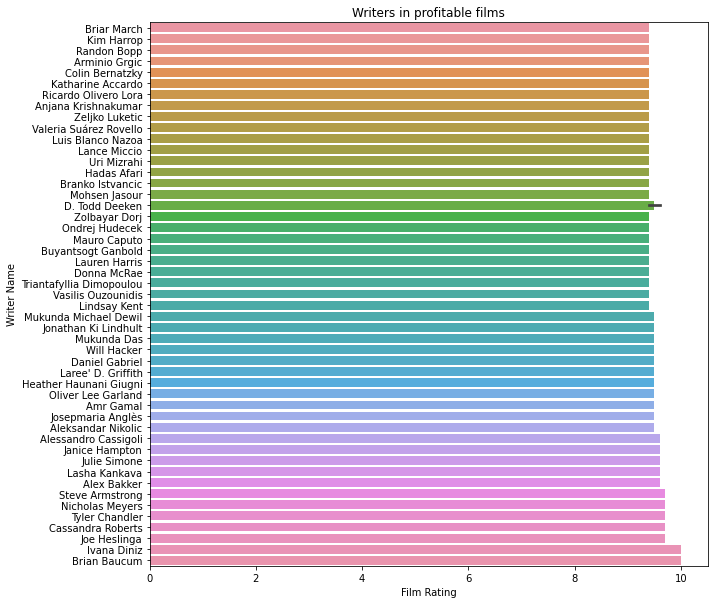

In [84]:
top_fift_writ = writers_w_rating.tail(50)

plt.figure(figsize=[10, 10])
sns.barplot(data=top_fift_writ, x='averagerating', y='primary_name')
plt.title("Writers in profitable films")
plt.xlabel('Film Rating')
plt.ylabel('Writer Name');

In [86]:
direct_w_avrg = pd.merge(top_direct, top_rated[['tconst', 'averagerating']], on='tconst') 

In [87]:
direct_w_avrg.sort_values('averagerating', inplace=True)

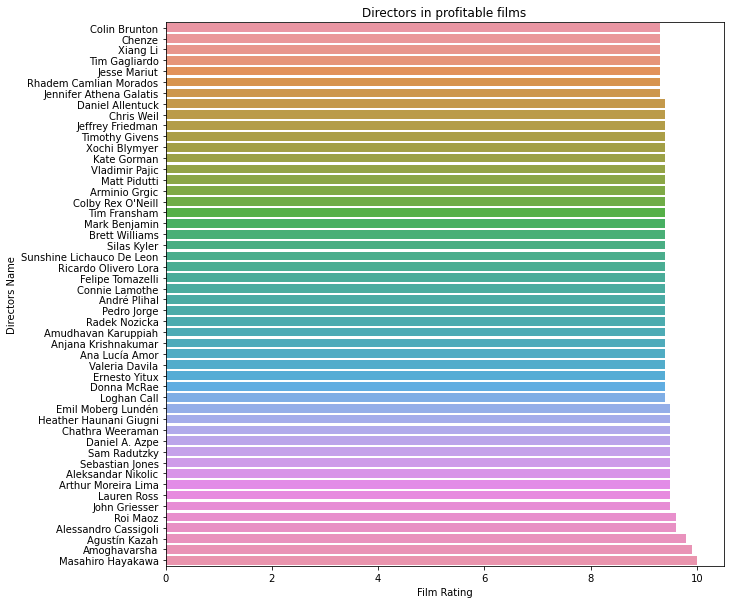

In [88]:
top_fift_dir = direct_w_avrg.tail(50)

plt.figure(figsize=[10, 10])
sns.barplot(data=top_fift_dir, x='averagerating', y='primary_name')
plt.title("Directors in profitable films")
plt.xlabel('Film Rating')
plt.ylabel('Directors Name');

In [89]:
actor_w_avrg = pd.merge(actors, top_rated[['tconst', 'averagerating']], on='tconst') 

In [90]:
actor_w_avrg.sort_values('averagerating', inplace=True)

In [91]:
actr_w_name = pd.merge(actor_w_avrg, people_involved_profession_relatedTitles[['nconst', 'primary_name']], on='nconst')

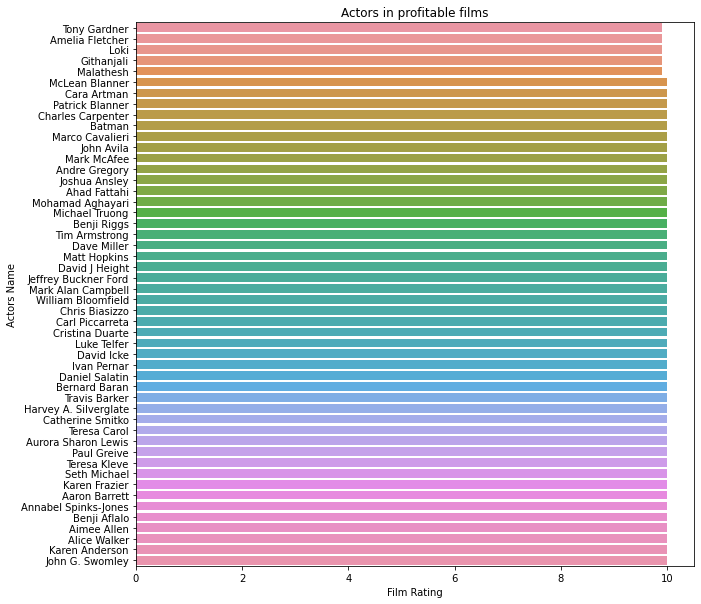

In [92]:
top_fift_dir = actr_w_name.tail(50)

plt.figure(figsize=[10, 10])
sns.barplot(data=top_fift_dir, x='averagerating', y='primary_name')
plt.title("Actors in profitable films")
plt.xlabel('Film Rating')
plt.ylabel('Actors Name');

where i messed up
1) should have made smaller data sets to THEN `join`
2) should have used somethingbesides bar charts from people
3) importing scipy was useless


if i had more time i would have scraped more data from the web, 
used The Numbers API to get more recent and complete data
and used IMDB's API to get more recent data about films